In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import scipy.stats as stt
import seaborn
seaborn.set(font_scale=1.5,style='ticks')

# Start again clean replication of derdikman code 

In [121]:
params = {'angleV':.2,     #angular velocity
          'maxY':10.,      #size of arena in Y
          'maxX':10.,      #size of arena in X
          'res': 75.,      #resolution, used for determining velocity
          'PC_sat': 30,    #peak firing rate of place cells
          'nCell_dim': 25,  #number of place cells in each dimension
          'PC_size': 0.75} 
params['V'] = 2.15*params['maxX']/params['res']

In [122]:
sigma_x = sigma_y = params['PC_size']
sigma_x2 = sigma_x*2; sigma_y2 = 2*sigma_y

In [123]:
theta = 2*np.pi*np.random.uniform(size=len(placeCenters[0]))#rand(1,length(placeCenters));
theta2 = 2*np.pi*np.random.uniform(size=len(placeCenters[0]))#rand(1,length(placeCenters));

In [124]:
print(np.sin(np.pi/4),np.cos(np.pi/4))

0.7071067811865475 0.7071067811865476


In [125]:
"""theta = 2*pi*rand(1,length(placeCenters)); %Gives a "tilt" to the place cell... not used when sigma_x =sigma_y
a_std = cos(theta).^2/2/sigma_x.^2 + sin(theta).^2/2/sigma_y.^2;
b_std = -sin(2*theta)/4/sigma_x.^2 + sin(2*theta)/4/sigma_y.^2 ;
c_std = sin(theta).^2/2/sigma_x.^2 + cos(theta).^2/2/sigma_y.^2;
% place cells sombrero hat - 2nd Gaussians
theta2 = 2*pi*rand(1,length(placeCenters));
a_std2 = cos(theta2).^2/2/sigma_x2.^2 + sin(theta2).^2/2/sigma_y2.^2;
b_std2 = -sin(2*theta2)/4/sigma_x2.^2 + sin(2*theta2)/4/sigma_y2.^2 ;
c_std2 = sin(theta2).^2/2/sigma_x2.^2 + cos(theta2).^2/2/sigma_y2.^2;
"""
print()

In [126]:
a_std = np.cos(theta)**2/2/sigma_x**2 + np.sin(theta)**2/2/sigma_y**2
b_std = -np.sin(2*theta)/4/sigma_x**2 + np.sin(2*theta)/4/sigma_y**2
c_std = np.sin(theta)**2/2/sigma_x**2 + np.cos(theta)**2/2/sigma_y**2

a_std2 = np.cos(theta2)**2/2/sigma_x2**2 + np.sin(theta2)**2/2/sigma_y2**2
b_std2 = -np.sin(2*theta2)/4/sigma_x2**2 + np.sin(2*theta2)/4/sigma_y2**2
c_std2 = np.sin(theta2)**2/2/sigma_x2**2 + np.cos(theta2)**2/2/sigma_y2**2


In [127]:
cell_pos_tmp = np.mod(np.arange(1,params['nCell_dim']-1),params['nCell_dim'] + 0.2)*params['maxX']/params['nCell_dim']
X,Y = np.meshgrid(cell_pos_tmp,cell_pos_tmp)
placeCenters = np.vstack([X.flatten(),Y.flatten()])

In [128]:
curDir = 0
xpos = 5
ypos = 5

In [129]:
##Do it slowly for a real random walk
st = time.time()
allX = []
allY = []
allR = []
for i in range(500):
    
    if np.remainder(i,100)==0:
        sys.stdout.write("\r%s" %i)
    curDir = np.mod(curDir + params['angleV']*np.random.normal(),2*np.pi)
    xpos = np.mod(xpos + params['V']*np.cos(curDir),params['maxX'])
    ypos = np.mod(ypos + params['V']*np.sin(curDir),params['maxY'])
    
    allX.append(xpos)
    allY.append(ypos)
    
    #get minimum distance modulo the wrapping of environment
    diff_x = np.min([np.mod(xpos-placeCenters[0],params['maxX']),
                np.mod(placeCenters[0]-xpos,params['maxX'])],axis=0);
    diff_y = np.min([np.mod(ypos-placeCenters[1],params['maxY']),
                    np.mod(placeCenters[1]-ypos,params['maxY'])],axis=0);

    sqDst1 = a_std*diff_x**2 + 2*b_std*diff_x*diff_y + c_std*diff_y**2
    sqDst2 = a_std2*diff_x**2 + 2*b_std2*diff_x*diff_y + c_std2*diff_y**2

    A = sigma_x**2/sigma_x2**2;
    r = (params['PC_sat']*np.exp(-sqDst1)) - (params['PC_sat'])*A*np.exp(-sqDst2)+1e-12
    allR.append(r)
    
print('\n',time.time() - st)

400
 0.2951509952545166


In [130]:
np.array(allR).shape

(500, 529)

In [147]:

for kkk in range(20):
    sys.stdout.write('\r%s' %kkk)
    sys.stdout.flush()
    xpos = np.random.uniform(0,10,size=50000)
    ypos = np.random.uniform(0,10,size=50000)


    diff_x = np.min([np.mod(xpos[:,None]-placeCenters[0][None,:],params['maxX']),
                np.mod(placeCenters[0][None,:]-xpos[:,None],params['maxX'])],axis=0);
    diff_y = np.min([np.mod(ypos[:,None]-placeCenters[1][None,:],params['maxY']),
                    np.mod(placeCenters[1][None,:]-ypos[:,None],params['maxY'])],axis=0);

    sqDst1 = a_std*diff_x**2 + 2*b_std*diff_x*diff_y + c_std*diff_y**2
    sqDst2 = a_std2*diff_x**2 + 2*b_std2*diff_x*diff_y + c_std2*diff_y**2

    A = sigma_x**2/sigma_x2**2;
    if kkk == 0:
        allR = (params['PC_sat']*np.exp(-sqDst1)) - (params['PC_sat'])*A*np.exp(-sqDst2)+1e-12
    else:
        tmp =  (params['PC_sat']*np.exp(-sqDst1)) - (params['PC_sat'])*A*np.exp(-sqDst2)+1e-12
        allR = np.vstack([allR,tmp])


19

In [7]:
allR = np.fromfile("/Users/Yves/Desktop/activity.bin",dtype='double')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Yves/Desktop/activity.bin'

In [6]:
allR = allR.reshape(-1,50000)

ValueError: cannot reshape array of size 7676928 into shape (50000)

In [148]:
allCorr = np.corrcoef(np.array(allR).T)

In [149]:
allCorr.shape

(529, 529)

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca.fit(allCorr)

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

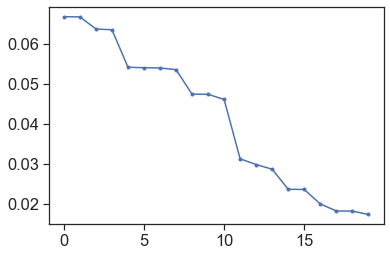

In [151]:
plt.plot(pca.explained_variance_ratio_[:20],marker='.')

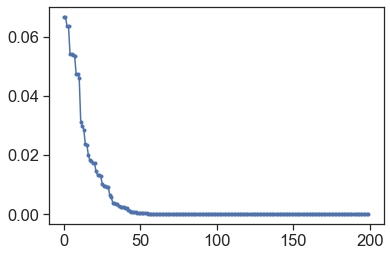

In [152]:
plt.plot(pca.explained_variance_ratio_,marker='.')

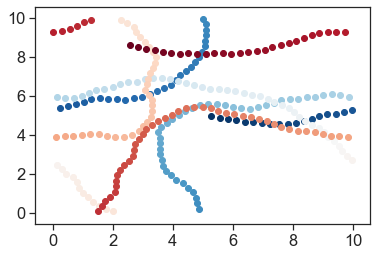

In [153]:
mx = 250
tot_len = len(allX)
every = int(np.floor(tot_len/mx))
clrs = seaborn.color_palette("RdBu_r",n_colors=mx)
for kk, (x,y) in enumerate(zip(allX[:mx],allY[:mx])):
    plt.scatter(x,y,color=clrs[kk])

## PLot a place field

In [155]:
nCells = len(placeCenters[0])
NX = 50
xx = np.linspace(0,10,num=NX)
yy = xx.copy()
allPF = np.zeros([nCells,NX,NX])
allPF1 = np.zeros([nCells,NX,NX])

allPF2 = np.zeros([nCells,NX,NX])

for xk,xpos in enumerate(xx):
    for yk, ypos in enumerate(yy):
        
        #squareDists = (a_std.*(diff_x).^2 +2*b_std.*(diff_x).*(diff_y) + c_std.*(diff_y).^2 );
        #squareDists2 = (a_std2.*(diff_x).^2 +2*b_std2.*(diff_x).*(diff_y) + c_std2.*(diff_y).^2 );

        
        #diff_x=min(mod(x-placeCenters(1,:),Struct.maxx),
        #           mod(placeCenters(1,:)-x,Struct.maxx));
        #diff_y=min(mod(y-placeCenters(2,:),Struct.maxx),mod(placeCenters(2,:)-y,Struct.maxy));


        diff_x = np.min([np.mod(xpos-placeCenters[0],params['maxX']),
                        np.mod(placeCenters[0]-xpos,params['maxX'])],axis=0)
        
        diff_y = np.min([np.mod(ypos-placeCenters[1],params['maxY']),
                        np.mod(placeCenters[1]-ypos,params['maxY'])],axis=0)

        sqDst1 = a_std*diff_x**2 + 2*b_std*diff_x*diff_y + c_std*diff_y**2
        sqDst2 = a_std2*diff_x**2 + 2*b_std2*diff_x*diff_y + c_std2*diff_y**2

        A = sigma_x**2/sigma_x2**2;
        
        r1 = (params['PC_sat']*np.exp(-sqDst1))
        r2 = (params['PC_sat'])*A*np.exp(-sqDst2)+1e-12
        r = r1 - r2

        allPF[:,xk,yk] = r
        allPF1[:,xk,yk] = r1
        allPF2[:,xk,yk] = r2

In [156]:
v,V = np.linalg.eig(allCorr)

In [157]:
sys.path.append("/Users/Yves/Desktop/FISTA-master/")
import fista

In [158]:
fsta = fista.Fista(loss='least_square',lambda_=0.1)

In [159]:
fsta.fit(np.ones([529,529]),allCorr.T,)

convergence at iteration : 11


Fista(lambda_=0.1, loss='least_square', n_iter=1000, penalty='l11',
      recompute_Lipschitz_constant=False)

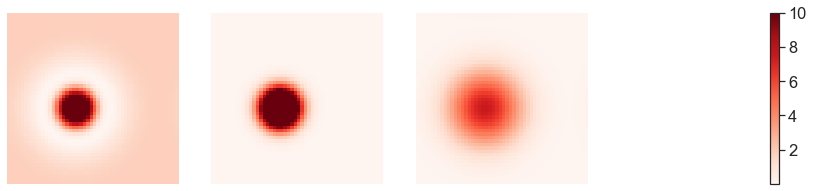

In [160]:
plt.figure(figsize=(12,3))
plt.subplot(1,4,1)
plt.imshow(allPF[220],cmap='Reds',vmax=10)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,2)
plt.imshow(allPF1[220],cmap='Reds',vmax=10)
plt.xticks([])
plt.yticks([])

#plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(allPF2[220],cmap='Reds',vmax=10)
plt.xticks([])
plt.yticks([])

plt.subplot(1,4,4)
plt.colorbar()
seaborn.despine(left=True,bottom=True)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

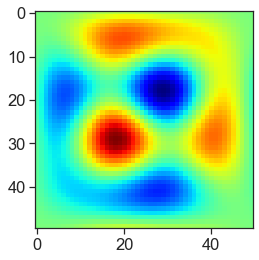

In [161]:
Vx= pca.components_[0][:,None,None]
#Vx = V[0][:,None,None].real
#Vx =z fsta.coefs_[:,None,None]

plt.imshow((Vx*allPF).sum(axis=0),cmap='jet')

# from sklearn.decomposition import NMF

In [1871]:
allCorr+np.min(allCorr)+1e-1

array([[ 0.91776652,  0.6714328 ,  0.17269132, ..., -0.13338662,
        -0.19761648, -0.24927043],
       [ 0.6714328 ,  0.91776652,  0.67167611, ..., -0.08882069,
        -0.13258203, -0.19634709],
       [ 0.17269132,  0.67167611,  0.91776652, ..., -0.07066824,
        -0.08868363, -0.1315241 ],
       ...,
       [-0.13338662, -0.08882069, -0.07066824, ...,  0.91776652,
         0.67202697,  0.18555192],
       [-0.19761648, -0.13258203, -0.08868363, ...,  0.67202697,
         0.91776652,  0.6816747 ],
       [-0.24927043, -0.19634709, -0.1315241 , ...,  0.18555192,
         0.6816747 ,  0.91776652]])

In [1872]:
pca = NMF(n_components=50)
pca.fit(allCorr+np.abs(np.min(allCorr))+1e-12)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=50, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

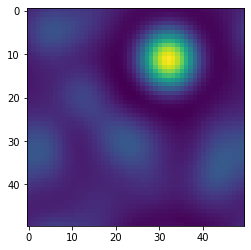

In [1818]:
Vx = pca.components_[0][:,None,None]
plt.imshow((Vx*allPF).sum(axis=0))

# Old stuff 

In [1233]:
def get_pf(sz=200,xy=None,C=None):
    """ Note that derdikman use difference of gaussian place fields"""
    if xy==None:
        xM,yM = np.random.randint(0,sz,2)
    else:
        xM,yM = xy
    if C==None:
        C = np.eye(2)*np.random.randint(10,500,2)/2
    pF = np.zeros([sz,sz])
    mn = stt.multivariate_normal([xM,yM],C)
    mn2 = stt.multivariate_normal([xM,yM],C*4)

    a,b = np.meshgrid(np.arange(sz),np.arange(sz))
    pF = mn.pdf(np.vstack([a.flatten(),b.flatten()]).T).reshape(sz,sz)*10 - \
         mn2.pdf(np.vstack([a.flatten(),b.flatten()]).T).reshape(sz,sz)*10
    #for x in np.arange(sz):
    #    for y in np.arange(sz):
    #        pF[x,y] = multinorm(np.array([x,y]),np.array([xM,yM]),C)
    return pF

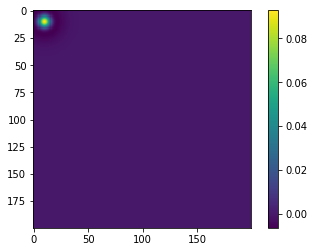

In [1234]:
plt.imshow(place_fields[0])
plt.colorbar()

In [1235]:
sz = 200
C = 15
spacing = 5
offs = 2

In [1236]:
place_fields = []

for x_ in range(offs,int(sz/spacing)-offs):
    for y_ in range(offs,int(sz/spacing)-offs):
        
        xy = [x_*spacing,y_*spacing]
        out = get_pf(sz=sz,xy=xy,C=C)
        place_fields.append(out)
place_fields = np.array(place_fields)

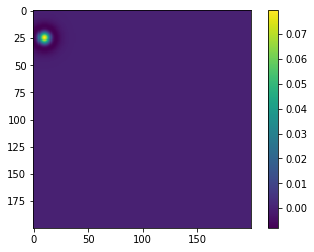

In [1237]:
plt.imshow(place_fields[3])
plt.colorbar()

In [1238]:
place_fields.shape

(1296, 200, 200)

In [1239]:
posX,posY = np.array([30,30])
acts = []
visit_grid = np.zeros([sz,sz])
for t in range(5000):
    
    acts.append(100*place_fields[:,posX,posY])
    #posX = np.clip(posX+np.random.randint(-1,2),0,sz-1)
    posX = (posX + np.random.randint(-1,2)) % sz
    #posY = np.clip(posY+np.random.randint(-1,2),0,sz-1)
    posY = (posY + np.random.randint(-1,2)) % sz

    visit_grid[posX,posY] += 1

In [1240]:
acts = np.array(acts)

In [1241]:
acts = place_fields.reshape(place_fields.shape[0],-1,order='C')

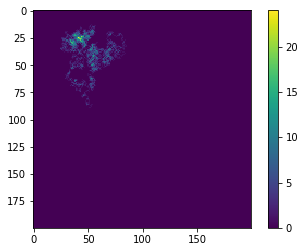

In [1242]:
plt.imshow(visit_grid)
plt.colorbar()

In [1243]:
acts.sum(axis=0).shape

(40000,)

In [1244]:
allCorr = np.corrcoef(np.array(acts))

In [1245]:
allCorr.shape

(1296, 1296)

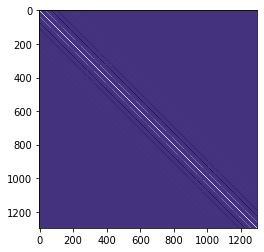

In [1246]:
plt.imshow(allCorr)

In [1247]:
allCorr.shape

(1296, 1296)

In [1248]:
allCorr[np.isnan(allCorr)] = 0

In [1249]:
v,V = np.linalg.eig(allCorr)

(1296, 1296)

In [1250]:
from sklearn.decomposition import PCA

In [1251]:
pca = PCA(n_components=20,)

In [1252]:
pca = PCA(n_components=20,)
pca.fit(allCorr)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [1253]:
pca.components_.shape

(20, 1296)

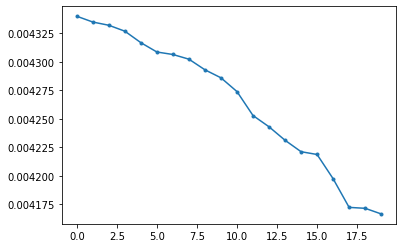

In [1254]:
plt.plot(pca.explained_variance_ratio_,marker='.')

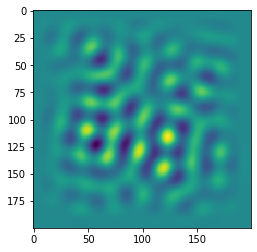

In [1255]:
plt.imshow((pca.components_[0][:,None,None]*place_fields).sum(axis=0))

In [1256]:
ix = 1
proj = np.mean((place_fields)*V[:,ix][:,None,None]/np.sum(V[:,ix]),axis=0)

In [1257]:
V.shape

(1296, 1296)

In [1258]:
place_fields.shape

(1296, 200, 200)

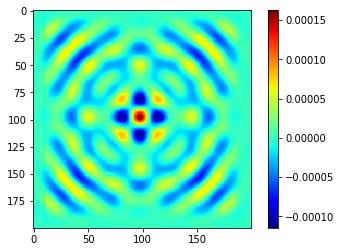

In [1259]:
plt.imshow(proj.real,cmap='jet')
plt.colorbar()

In [480]:
multinorm = lambda x,mu,C: 1/np.sqrt((2*np.pi)**2 * np.linalg.det(C)) * np.exp(-.5*(x-mu).dot(np.linalg.inv(C)).dot(x-mu))

In [332]:
x,y = np.meshgrid(np.arange(-10,10),np.arange(-10,10))
X = np.vstack([x.flatten(),y.flatten()])
mu = np.array([5,5])
C = np.eye(2)

In [333]:
X.T.dot(C).dot(X).shape

(400, 400)

In [75]:
np.dot((X.T-mu).T,(np.linalg.inv(C))).shape

ValueError: shapes (2,400) and (2,1,2) not aligned: 400 (dim 1) != 1 (dim 1)

In [68]:
np.exp(-.5*(X.T-mu).dot(np.linalg.inv(C)).T.dot((X.T-mu)))

array([[0., 0.],
       [0., 0.]])

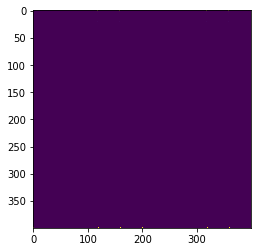

In [50]:
plt.imshow(np.exp(-.5*(X.T-mu).dot(np.linalg.inv(C)).dot((X.T-mu).reshape(2,-1))))

In [53]:
np.max(np.exp(-.5*(X.T-mu).dot(np.linalg.inv(C)).dot((X.T-mu).reshape(2,-1))))

1.1420073898156842e+26

In [17]:
multinorm(X.T,np.eye(2),mu)

LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

In [80]:
stt.multivariate_normal([5,5],np.eye(2)).pdf([2,1])

5.931152735254127e-07

In [81]:
multinorm(np.array([2,1]),[5,5],np.eye(2))

5.931152735254121e-07

In [ ]:
pc = np.zeros([200,200])
pc